In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
df=pd.read_csv("/kaggle/input/housedata/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.shape

(4600, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**We dont have any Null Values**

In [5]:
df["city"].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df=df[["price","bedrooms","bathrooms","sqft_living","floors"]]
df

,price,bedrooms,bathrooms,sqft_living,floors
0,3.130000e+05,3.0,1.50,1340,1.5
1,2.384000e+06,5.0,2.50,3650,2.0
2,3.420000e+05,3.0,2.00,1930,1.0
3,4.200000e+05,3.0,2.25,2000,1.0
4,5.500000e+05,4.0,2.50,1940,1.0
...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,1.0
4596,5.343333e+05,3.0,2.50,1460,2.0
4597,4.169042e+05,3.0,2.50,3010,2.0
4598,2.034000e+05,4.0,2.00,2090,1.0


In [8]:
df["bedrooms"].value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

In [9]:
df["bathrooms"].value_counts()

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

In [10]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors
price,1.000000,0.200336,0.327110,0.430410,0.151461
bedrooms,0.200336,1.000000,0.545920,0.594884,0.177895
bathrooms,0.327110,0.545920,1.000000,0.761154,0.486428
sqft_living,0.430410,0.594884,0.761154,1.000000,0.344850
floors,0.151461,0.177895,0.486428,0.344850,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

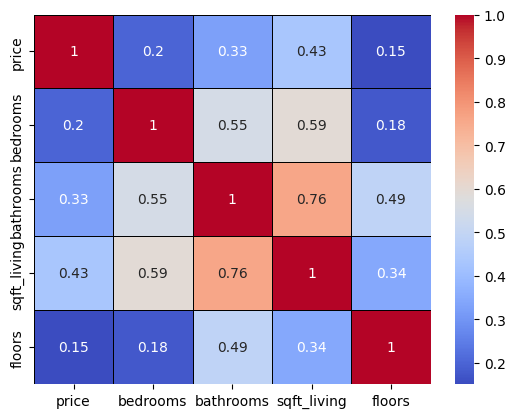

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=0.5,linecolor='black')

<Axes: xlabel='sqft_living', ylabel='price'>

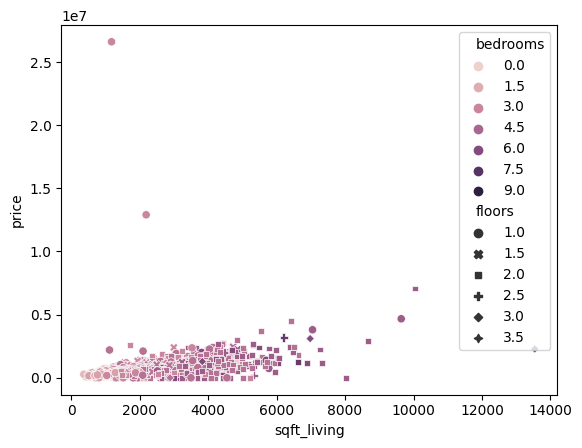

In [13]:
sns.scatterplot(x=df['sqft_living'],y=df['price'],hue=df['bedrooms'],style=df['floors'])

Text(0, 0.5, 'Price in Millions')

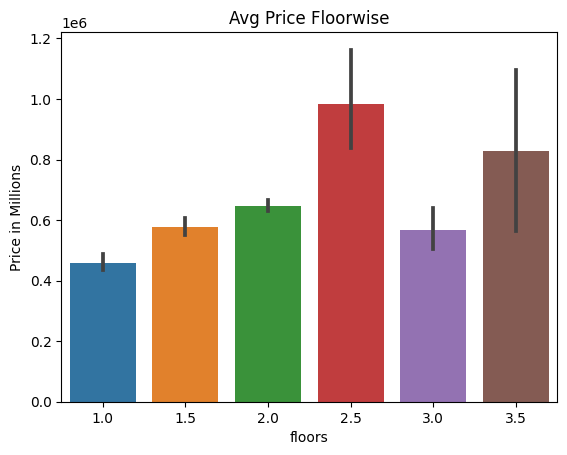

In [14]:
sns.barplot(x=df['floors'],y=df['price'])
plt.title("Avg Price Floorwise")
plt.ylabel("Price in Millions")

Text(0, 0.5, 'Price in Millions')

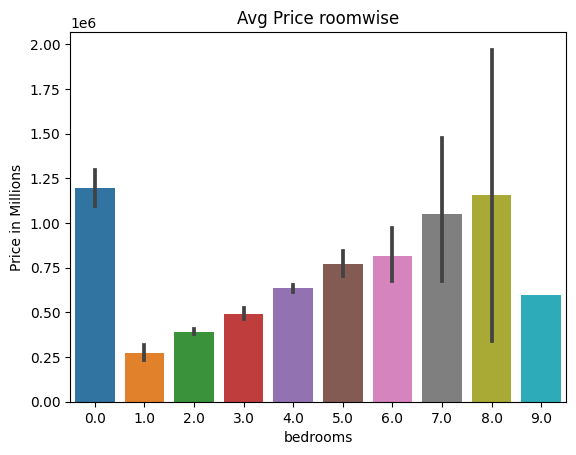

In [15]:
sns.barplot(x=df['bedrooms'],y=df['price'])
plt.title("Avg Price roomwise")
plt.ylabel("Price in Millions")

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns= ["price"]),df["price"],test_size=0.2,random_state=42)

In [18]:
X_train

,bedrooms,bathrooms,sqft_living,floors
1898,4.0,2.50,2770,2.0
1370,4.0,3.00,3720,2.0
3038,4.0,2.50,2810,2.0
2361,4.0,3.75,4030,2.0
156,3.0,2.00,2000,2.0
...,...,...,...,...
4426,3.0,1.00,1180,1.5
466,4.0,2.00,2520,1.0
3092,3.0,1.00,1150,1.0
3772,2.0,1.00,910,1.5


In [19]:
from sklearn.linear_model import LinearRegression

Lg = LinearRegression()

Lg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred= Lg.predict(X_test)
y_pred

array([ 366264.3703757 ,  397744.52253253,  823880.59649005,
        578757.53028177,  432565.03656237,  719421.5519923 ,
        499368.12817199,  497087.1344607 ,  493006.07969967,
        505188.78750962,  781370.4688506 ,  271164.5900062 ,
        834805.1628028 ,  499307.67169884,  411889.06818987,
        620762.73490652,  662920.21874406,  737836.95857919,
        950269.66201212,  978304.09295375,  775420.45981759,
        692010.45941991,  633519.2589534 ,  472721.7188408 ,
        243482.80286647,  219388.08181391,  719562.89686426,
        822974.56837688,  383915.09372138,  692774.61224324,
       1559102.46125792,  347366.97029153, 1260758.49761913,
        495970.86825334,  194800.43292322,  433317.72462698,
        883888.10742663,  778142.5831748 ,  286251.62989667,
        619055.55743217,  433269.26333043,  371591.04103947,
        469946.73645565,  423930.43112786,  300505.09332371,
        315733.47808615,  497499.17390001,  445792.08934782,
        755888.78702333,

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

991657231245.9584
223831.69595289152
0.02764054518114245
